# Project: Investigate a Dataset - [No-show appointments]

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

### Dataset Description 

> This dataset collects information
from 100k medical appointments in
Brazil and is focused on the question
of whether or not patients show up
for their appointment. A number of
characteristics about the patient are
included in each row.

###### Data frame columns
> __‘ScheduledDay’__ tells us on
what day the patient set up their
appointment.<br>
__‘Neighborhood’__ indicates the location of the hospital.<br>
__‘Scholarship’__ indicates
whether or not the patient is
enrolled in Brasilian welfare
program. <br> 
__'Age'__ indicates the age of the patient.<br>
__'no_show'__ indicates whether a patient showed up or not for appointment<br>
__'hipertension'__ indicates whether a patient is hipertensive or not <br>
__'alcoholism'__ indicates if a patient suffers alcoholism or not <br>
__'Handcap'__ indicates if a patient is disabled or not <br>
__'Diabetes'__ indicates if a patient is diabetic or not <br>



### Question(s) for Analysis
>**Question 1**:Research Question 1: Who goes to the doctor often, Male or Females with a higher rate?<br>
**Question 2**: at what hour of the day do people show up the most?<br>
**Question 3**: among people that showed up, what mean age bracket are they and at what mean hour did they show up?<br>
**Question 4**: which medical condition category has the highest rate of appointments?<br>
**Question 5**: Does medical condition affects appointment show rate?<br>
**Question 6**: Which Gender suffers more of a given medical condition?
**Question 7**: Does scholarship has effect on show rate?

In [62]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import collections
%matplotlib inline

<a id='wrangling'></a>
## Data Wrangling

> **Tip**: In this section of the report, you will load in the data, check for cleanliness, and then trim and clean your dataset for analysis. Make sure that you **document your data cleaning steps in mark-down cells precisely and justify your cleaning decisions.**


### General Properties
> **Tip**: You should _not_ perform too many operations in each cell. Create cells freely to explore your data. One option that you can take with this project is to do a lot of explorations in an initial notebook. These don't have to be organized, but make sure you use enough comments to understand the purpose of each code cell. Then, after you're done with your analysis, create a duplicate notebook where you will trim the excess and organize your steps so that you have a flowing, cohesive report.

In [63]:
data_table = pd.read_csv('noshowappointments-kagglev2-may-2016.csv')

>import the dataframe to the workspace

In [64]:
data_table.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


>have little view of the dataframe header

In [65]:
data_table.dtypes

PatientId         float64
AppointmentID       int64
Gender             object
ScheduledDay       object
AppointmentDay     object
Age                 int64
Neighbourhood      object
Scholarship         int64
Hipertension        int64
Diabetes            int64
Alcoholism          int64
Handcap             int64
SMS_received        int64
No-show            object
dtype: object

>dataset made up different data types(float, int, object{stringe})

In [66]:
data_table.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


Getting the statistical overview of the numeric columns of the dataframe
>spotted -1 age value, neglible tho

In [67]:
data_table.shape

(110527, 14)

>dataset has 110527 entry points with 14 properties for each.

In [68]:
data_table.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hipertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handcap         110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No-show         110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


>no null values in any of the columns

In [69]:
data_table.isnull().sum()

PatientId         0
AppointmentID     0
Gender            0
ScheduledDay      0
AppointmentDay    0
Age               0
Neighbourhood     0
Scholarship       0
Hipertension      0
Diabetes          0
Alcoholism        0
Handcap           0
SMS_received      0
No-show           0
dtype: int64

>going further to verify no null value exists in the columns

In [70]:
data_table.nunique()

PatientId          62299
AppointmentID     110527
Gender                 2
ScheduledDay      103549
AppointmentDay        27
Age                  104
Neighbourhood         81
Scholarship            2
Hipertension           2
Diabetes               2
Alcoholism             2
Handcap                5
SMS_received           2
No-show                2
dtype: int64

>there unique 62299 patients that booked 110527 appointments

In [73]:
# function to get unique values
def unique_value(column):
 
    unique = []
     
    for value in column:
        if value not in unique:
            unique.append(value)

    for value in unique:
        print(value)

>this function helps in getting the unique values in each column in my dataset.

In [74]:
unique_value(data_table['Handcap'])

0
1
2
3
4


>Handicap according to kaggle should be 0 or 1, but i can see 2,3,4. this input error or maybe handicap has different classification levels

In [75]:
data_table.Handcap.value_counts()

0    108286
1      2042
2       183
3        13
4         3
Name: Handcap, dtype: int64

>sum of the counts of 2 to 4 is small, so i can conclude this is an input error

In [76]:
unique_value(data_table['Alcoholism'])

0
1


>Alcoholism is still a binary classification

In [77]:
unique_value(data_table['Diabetes'])

0
1


>Diatetes same binary class

In [78]:
unique_value(data_table['SMS_received'])

0
1


>Recieved_sms same binary variable


### Data Cleaning
> **Tip**: Make sure that you keep your reader informed on the steps that you are taking in your investigation. Follow every code cell, or every set of related code cells, with a markdown cell to describe to the reader what was found in the preceding cell(s). Try to make it so that the reader can then understand what they will be seeing in the following cell(s).
 

In [79]:
data_table.rename(columns=lambda x: x.strip().lower().replace("-", "_"), inplace=True)

>convert columns names to lower case and remove '-' from column names to make it easier to call column names in cleaning operation.

In [80]:
data_table.drop(['patientid', 'appointmentid'], axis = 1, inplace = True)

>Drop columns that will not be needed in our exploration analysis

In [81]:
data_table.handcap.replace(to_replace=[2, 3, 4], value=1, inplace=True, limit=None, regex=False, method='pad')
data_table['handcap'].value_counts()

0    108471
1      2056
Name: handcap, dtype: int64

>Replace 2,3,4 with 1, this will not have much effect as it is a little percent of the dataset.

In [82]:
data_table['showed_up'] = data_table['no_show'].map({'Yes': 0, 'No': 1})

>add a new column to replace no_show column as YES/NO representation can easily be misinterpreted and interchanged 

In [83]:
data_table.showed_up.value_counts() #equals same.

1    88208
0    22319
Name: showed_up, dtype: int64

>to comfirm its still the classification number as before

In [85]:
data_table.drop('no_show', axis = 1, inplace = True)

KeyError: "['no_show'] not found in axis"

>drop no_show column as its no longer necesaary for our analysis

In [86]:
data_table.duplicated().sum()

635

>dataframe has 635 duplicate values, lets drop them

In [87]:
data_table.drop_duplicates(inplace = True)

>drop duplicates

In [88]:
data_table.duplicated().sum()

0

>comfine theres no duplicate

In [89]:
data_table['appointmentday'] = pd.to_datetime(data_table['appointmentday'])
data_table['scheduledday'] = pd.to_datetime(data_table['scheduledday'])

>convert 'appointmentday' and scheduledday' to proper date format

In [91]:
data_table['weekday_name'] = data_table['scheduledday'].dt.day_name()
data_table['month']   = data_table['scheduledday'].dt.month_name()
data_table['day']     = data_table['scheduledday'].dt.day
data_table['hour']    = data_table['scheduledday'].dt.hour

>Lets help extract more information from 'scheduledday'that will help in answering our analysis question

In [92]:
data_table.head(1)

,gender,scheduledday,appointmentday,age,neighbourhood,scholarship,hipertension,diabetes,alcoholism,handcap,sms_received,showed_up,weekday_name,month,day,hour
0,F,2016-04-29 18:38:08+00:00,2016-04-29 00:00:00+00:00,62,JARDIM DA PENHA,0,1,0,0,0,0,1,Friday,April,29,18


>Check and verify the addition of extra features 

<a id='eda'></a>
## Exploratory Data Analysis



### Research Question 1: Who goes to the doctor often, Male or Females with a higher rate?

In [93]:
data_table.gender.value_counts()

F    71417
M    38475
Name: gender, dtype: int64

In [94]:
Female = data_table.gender.value_counts()[0] / data_table.shape[0]
Female

0.6498835220034216

In [95]:
Male = data_table.gender.value_counts()[1] / data_table.shape[0]
Male

0.35011647799657847

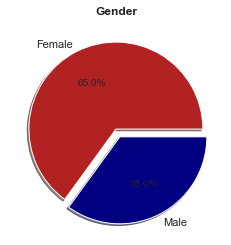

In [97]:
plt.pie(data_table['gender'].value_counts(), labels = ['Female', 'Male'], colors=['firebrick', 'navy'], 
        startangle=0, shadow = True, explode = (0, 0.1),
        radius = 1.0, autopct = '%1.1f%%')

plt.title('Gender', fontweight="bold")

plt.show()

In [98]:
data_table.groupby('gender')['showed_up'].mean()

gender
F    0.797597
M    0.801352
Name: showed_up, dtype: float64

In [99]:
data_table.columns

Index(['gender', 'scheduledday', 'appointmentday', 'age', 'neighbourhood',
       'scholarship', 'hipertension', 'diabetes', 'alcoholism', 'handcap',
       'sms_received', 'showed_up', 'weekday_name', 'month', 'day', 'hour'],
      dtype='object')

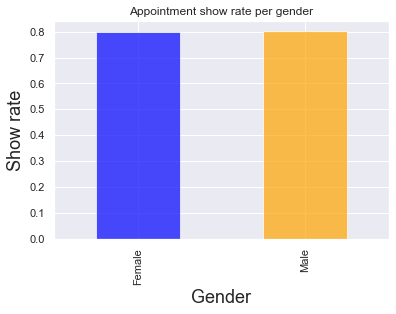

In [100]:
# show rate bar chart with one bar for Females (F) and one bar for Males (M).

data_table.groupby('gender')['showed_up'].mean().plot(kind='bar', alpha=.7, color=['blue', 'orange']);

# title and labels
plt.xticks([0, 1], ['Female', 'Male'])
plt.ylabel('Show rate', fontsize=18)
plt.xlabel('Gender', fontsize=18)
plt.title('Appointment show rate per gender');

>Both male and females visited the doctor at almost the same rate.

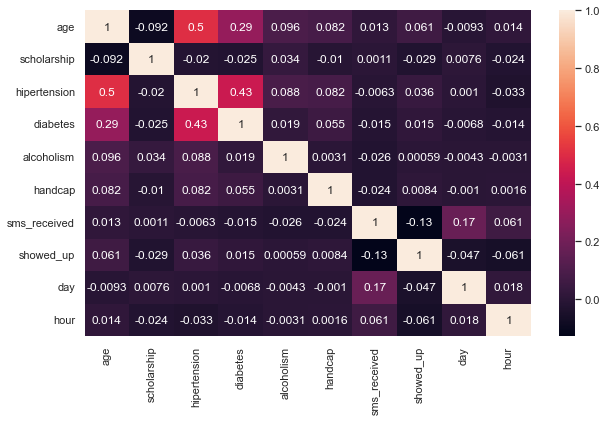

In [101]:
corrMatrix = data_table.corr()
sns.set(rc={'figure.figsize':(10,6)})
sns.heatmap(corrMatrix, annot=True)
plt.show()

>there are strong correlation between age and hipertension, hipertension and diabetes. 

### Research Question 2 : at what hour do people show up the most?

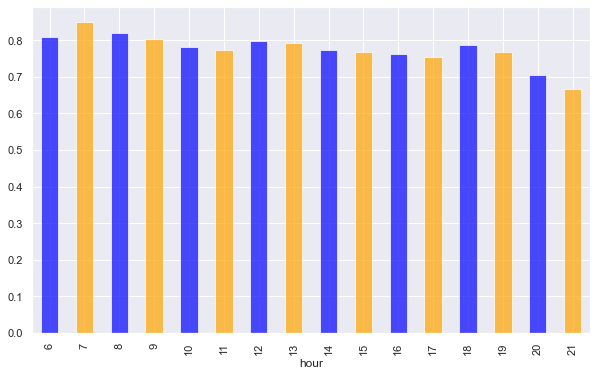

In [102]:
data_table.groupby(['hour'])['showed_up'].mean().plot(kind='bar', alpha=.7, color=['blue', 'orange']);


>patients showed up more for appointments in the morning and the rate decreases as the day goes by

### Research Question 3 : among people that showed up, what age bracket are they and at what hour did they show up?

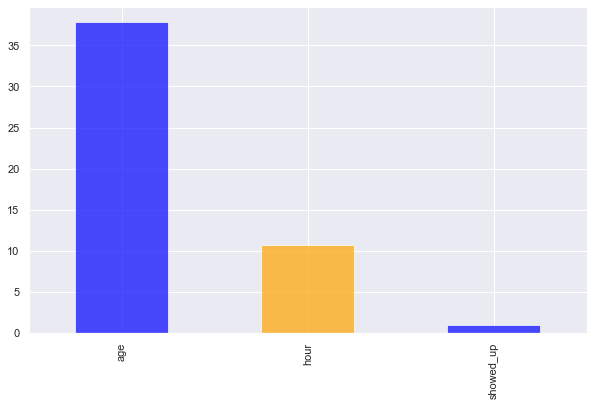

In [104]:
df_age_hour = data_table[['age', 'hour', 'showed_up']]

df_age_hour[df_age_hour['showed_up']==1].mean().plot(kind='bar', alpha=.7, color=['blue', 'orange']);

>People of mean age 37years showed more for appointment and people show up more for appointment at 10am in the morning.

### Research Question 4 : which medical condition has the highest rate of appointments?

In [105]:
diabetes = data_table.diabetes.mean()*100

hyper = data_table.hipertension.mean()*100

alcoholism = data_table.alcoholism.mean()*100

handicap = data_table.handcap.mean()*100

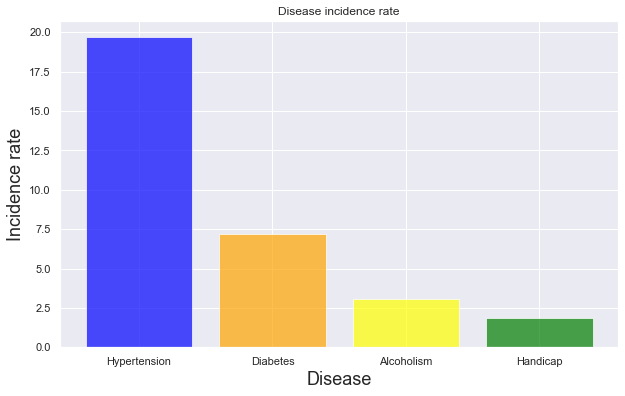

In [106]:
heights = [hyper, diabetes, alcoholism, handicap]
labels = ['Hypertension', 'Diabetes', 'Alcoholism', 'Handicap']

plt.bar([1, 2, 3, 4],heights,color=['blue', 'orange', 'yellow', 'green'], alpha=0.7);
plt.title('Disease incidence rate')
plt.xlabel('Disease', fontsize=18)
plt.ylabel('Incidence rate', fontsize=18)
plt.xticks([1, 2, 3, 4], labels);

>hipertension has the highest rate of about 20% followed by Diabetes

### Research Question 5 : Does medical condition affects appointment show rate?

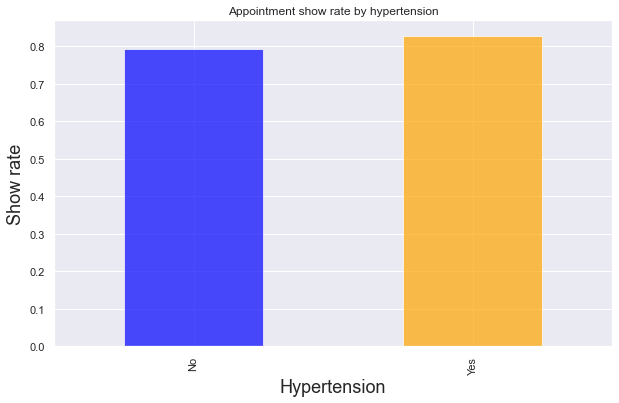

In [107]:
data_table.groupby('hipertension')['showed_up'].mean().plot(kind='bar', alpha=.7, color=['blue', 'orange']);

# title and labels
plt.xticks([0, 1], ['No', 'Yes'])
plt.title('Appointment show rate by hypertension');
plt.ylabel('Show rate', fontsize=18)
plt.xlabel('Hypertension', fontsize=18);

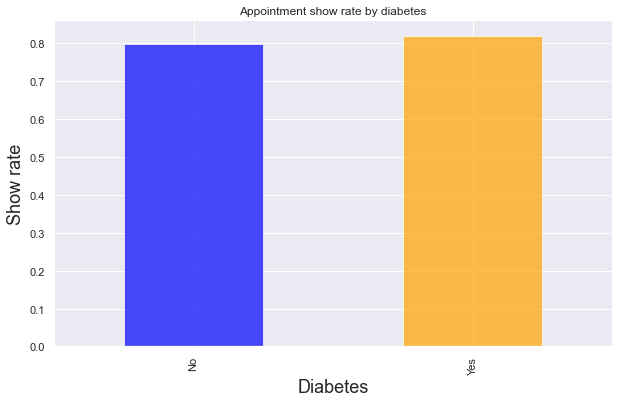

In [109]:
data_table.groupby('diabetes')['showed_up'].mean().plot(kind='bar', alpha=.7, color=['blue', 'orange']);

# title and labels
plt.xticks([0, 1], ['No', 'Yes'])
plt.title('Appointment show rate by diabetes');
plt.ylabel('Show rate', fontsize=18)
plt.xlabel('Diabetes', fontsize=18);

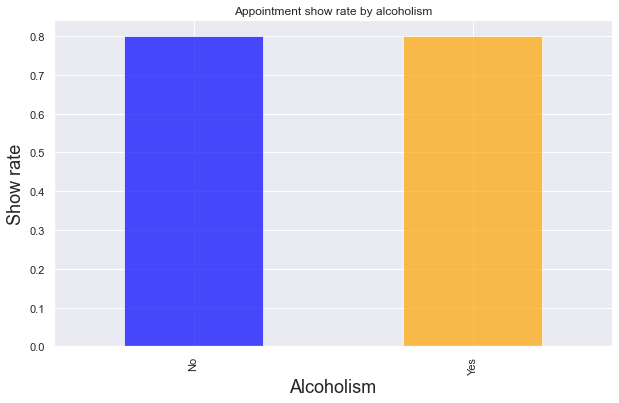

In [110]:
data_table.groupby('alcoholism')['showed_up'].mean().plot(kind='bar', alpha=.7, color=['blue', 'orange']);

# title and labels
plt.xticks([0, 1], ['No', 'Yes'])
plt.title('Appointment show rate by alcoholism');
plt.ylabel('Show rate', fontsize=18)
plt.xlabel('Alcoholism', fontsize=18);

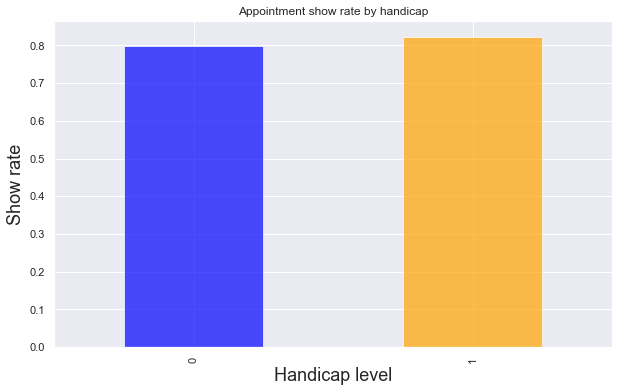

In [111]:
data_table.groupby('handcap')['showed_up'].mean().plot(kind='bar', alpha=.7, color=['blue', 'orange', 'yellow', 'green', 'magenta']);

# title and labels

plt.title('Appointment show rate by handicap');
plt.ylabel('Show rate', fontsize=18)
plt.xlabel('Handicap level', fontsize=18);

>no obvious observation to indicate any particular condition did better in keeping to appointments

### Research Question 6: Which Gender suffers more of a given medical condition?

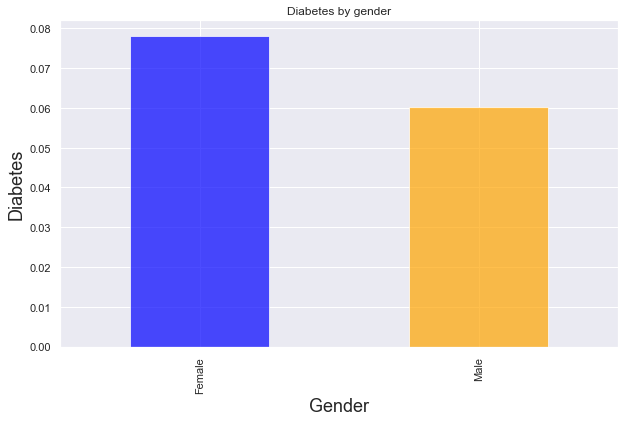

In [112]:
data_table.groupby('gender')['diabetes'].mean().plot(kind='bar', alpha=.7, color=['blue', 'orange']);

# title and labels
plt.xticks([0, 1], ['Female', 'Male'])
plt.title('Diabetes by gender');
plt.xlabel('Gender', fontsize=18);
plt.ylabel('Diabetes', fontsize=18);

>Females suffer diabetes more than male

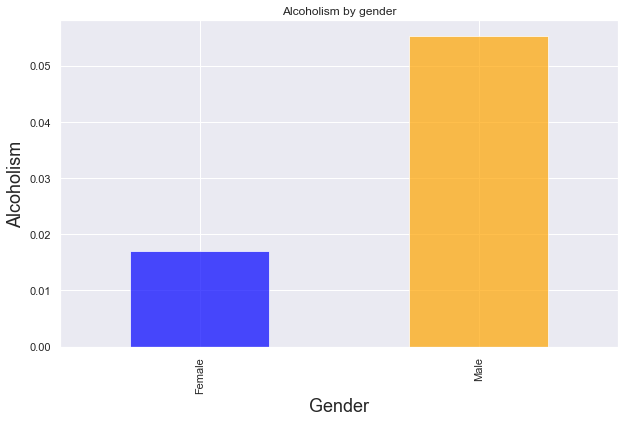

In [113]:
data_table.groupby('gender')['alcoholism'].mean().plot(kind='bar', alpha=.7, color=['blue', 'orange']);

# title and labels
plt.xticks([0, 1], ['Female', 'Male'])
plt.title('Alcoholism by gender');
plt.xlabel('Gender', fontsize=18);
plt.ylabel('Alcoholism', fontsize=18);

>Males suffer far more alcoholism than females.

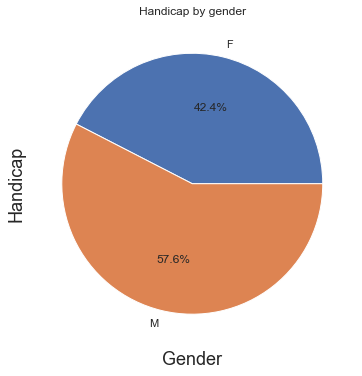

In [114]:
data_table.groupby('gender')['handcap'].mean().plot(kind='pie', autopct = '%1.1f%%');

# title and labels
plt.title('Handicap by gender');
plt.xlabel('Gender', fontsize=18);
plt.ylabel('Handicap', fontsize=18);

>Males suffer more disabilities than females.

### Research Question 7: Does scholarship has effect on show rate?

In [115]:
data_table.scholarship.value_counts()

0    99091
1    10801
Name: scholarship, dtype: int64

In [118]:
no_scholar = data_table.scholarship.value_counts()[0] / data_table.shape[0]
no_scholar

0.9017125905434427

In [119]:
scholar = data_table.scholarship.value_counts()[1] / data_table.shape[0]
scholar

0.09828740945655735

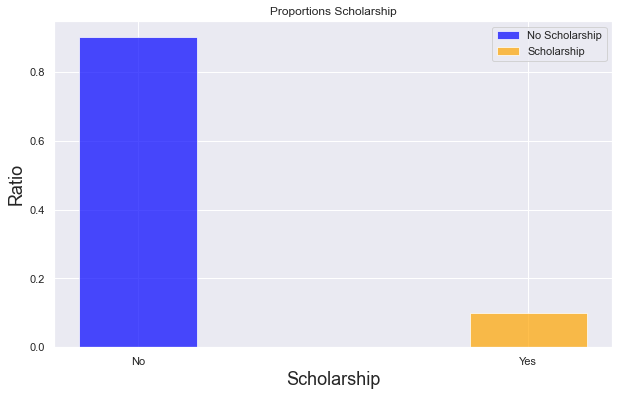

In [120]:
no_scholar_bar = plt.bar(0, no_scholar, width=.3, alpha=0.7, color ='blue', label='No Scholarship' )
scholar_bar = plt.bar(1, scholar, width=.3, alpha=0.7, color='orange', label='Scholarship')

# title and labels
plt.xticks([0, 1], ['No', 'Yes'])
plt.xlabel('Scholarship', fontsize=18)
plt.ylabel('Ratio', fontsize=18)
plt.title('Proportions Scholarship');
plt.legend();

>just 9.8% are on scholarship

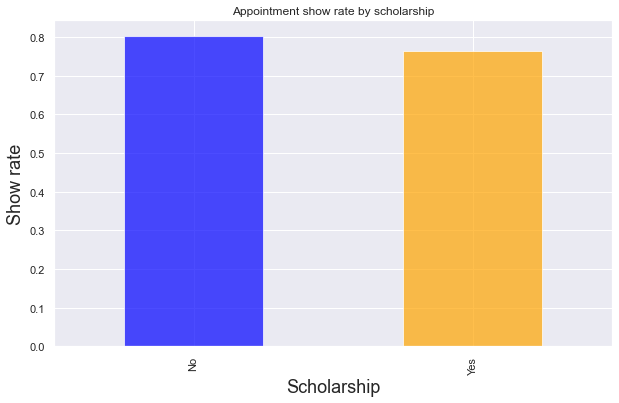

In [122]:
# show rate bar chart with scholarship

data_table.groupby('scholarship')['showed_up'].mean().plot(kind='bar', alpha=.7, color=['blue', 'orange']);

# title and labels
plt.xticks([0, 1], ['No', 'Yes'])
plt.title('Appointment show rate by scholarship')
plt.xlabel('Scholarship', fontsize=18)
plt.ylabel('Show rate', fontsize=18);

>Scholarship has no effect on the rate at which patients show up for appointments

### Research Question 8: Which age bracket booked more appointment?

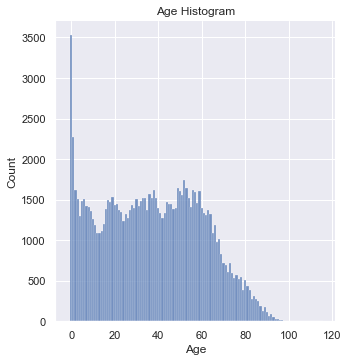

In [123]:
ax=sns.displot(data_table, x="age", discrete=True).set(title='Age Histogram', xlabel='Age');

>The number of children up to 10 years is considerably higher, let's investigate further:

In [124]:
collections.Counter(data_table['age']<=10)

Counter({False: 91219, True: 18673})

>This comfirms this...children below age of 11 years made up about 20% of all appointments

<a id='conclusions'></a>
## Conclusions

1. question one summary: Both male and females visited the doctor at almost the same rate even tho female patients outnumbered the male counterparts.

2. question two summary: patients showed up more for appointments in the morning and the rate decreases as the day goes by.

3. question three summary: People of mean age 37years showed more for appointment and people show up more for appointment at 10am in the morning.

4. question four summary: hipertension has the highest rate of about 20% followed by Diabetes

5. question five summary:no obvious observation to indicate any particular condition did better in keeping to appointments

6. Question six: 
> <br>Females suffer diabetes more than male 
> <br>Males suffer 3X more alcoholism than females.
> <br>Males suffer more disabilities than females

7. Question seven:  Scholarship has no positive effect on the rate at which patients show up for appointments, tho the data collected do not have much patients on the scholarship scheme captured.


## Limitations
>I did not use any statistical method because most of the independent variables are binary values.

>the data collected do not have much patients on the scholarship scheme captured, this limited the analysis and void of further conclusions.

>The correlations was not used in any way to make any conclusions due to lack of any statistical analysis due to the nature of the dataset